In [5]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [6]:
data = pd.read_csv("datasets/data_with_nans.csv")

In [7]:
data.head()

,Unnamed: 0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,1,4.7,3.2,1.6,0.2,Iris-setosa
2,2,2,4.9,3.1,1.5,0.1,Iris-setosa
3,3,3,4.4,2.9,1.4,0.2,Iris-setosa
4,4,4,5.0,3.4,1.5,0.2,Iris-setosa


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
Unnamed: 0       170 non-null int64
Id               170 non-null int64
SepalLengthCm    167 non-null float64
SepalWidthCm     169 non-null float64
PetalLengthCm    166 non-null float64
PetalWidthCm     168 non-null float64
Species          170 non-null object
dtypes: float64(4), int64(2), object(1)
memory usage: 9.4+ KB


## Gereksiz kolonların düşürülmesi

In [9]:
data.columns

Index(['Unnamed: 0', 'Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
       'PetalWidthCm', 'Species'],
      dtype='object')

In [10]:
data.drop(labels=[data.columns[0]], axis=1, inplace=True)

In [11]:
data.tail(20)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
150,150,5.8,2.7,5.1,1.9,Iris-virginica
151,151,6.8,3.2,5.9,2.3,Iris-virginica
152,152,6.7,3.3,5.7,2.5,Iris-virginica
153,153,6.3,2.5,5.0,1.9,Iris-virginica
154,154,6.3,2.7,4.9,1.8,Iris-virginica
155,155,6.5,3.0,5.2,2.0,Iris-virginica
156,156,6.2,3.4,5.4,2.3,Iris-virginica
157,157,5.9,3.0,5.1,1.8,Iris-virginica
158,158,6.4,2.8,5.6,2.2,Iris-virginica
159,159,7.7,3.8,6.7,2.2,Iris-virginica


In [12]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,170.000000,167.000000,169.000000,166.000000,168.000000
mean,84.500000,5.826347,3.072781,3.707229,1.180357
std,49.218899,0.827189,0.447578,1.789382,0.765049
min,0.000000,4.300000,2.000000,1.000000,0.100000
25%,42.250000,5.100000,2.800000,1.500000,0.300000
50%,84.500000,5.800000,3.000000,4.300000,1.300000
75%,126.750000,6.400000,3.400000,5.100000,1.800000
max,169.000000,7.900000,4.400000,6.900000,2.500000


In [13]:
data.groupby("Species").agg(["min", "max", "std", "mean"])

Id                        SepalLengthCm                 \
                 min  max        std   mean           min  max       std   
Species                                                                    
Iris-setosa        0   59  17.464249   29.5           4.3  6.9  0.429014   
Iris-versicolor   60  113  15.732133   86.5           4.9  7.0  0.516189   
Iris-virginica   114  169  16.309506  141.5           4.9  7.9  0.650025   

                          SepalWidthCm                          PetalLengthCm  \
                     mean          min  max       std      mean           min   
Species                                                                         
Iris-setosa      5.034483          2.3  4.4  0.390709  3.389831           1.0   
Iris-versicolor  5.932075          2.0  4.4  0.382355  2.805556           1.5   
Iris-virginica   6.546429          2.2  3.9  0.355203  2.996429           1.3   

                                         PetalWidthCm                           
                 max       std      mean          min  max       std      mean  
Species                                                                         
Iris-setosa      5.4  0.639570  1.572414          0.1  2.1  0.295950  0.300000  
Iris-versicolor  5.1  0.623167  4.190385          0.4  1.8  0.235049  1.314815  
Iris-virginica   6.9  0.795195  5.469643          0.4  2.5  0.353215  1.992727

In [14]:
data.isna().sum()

Id               0
SepalLengthCm    3
SepalWidthCm     1
PetalLengthCm    4
PetalWidthCm     2
Species          0
dtype: int64

In [15]:
for column in data.columns[1:-1]:
    data[column].fillna(value=data[column].mean(), inplace=True)
    

In [16]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [17]:
data.dropna(axis=0, how="any", inplace=True)

## Verilerin Görselleştirilmesi

In [18]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.7,3.2,1.6,0.2,Iris-setosa
2,2,4.9,3.1,1.5,0.1,Iris-setosa
3,3,4.4,2.9,1.4,0.2,Iris-setosa
4,4,5.0,3.4,1.5,0.2,Iris-setosa


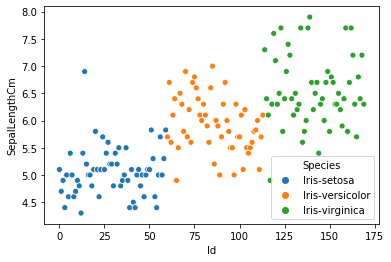

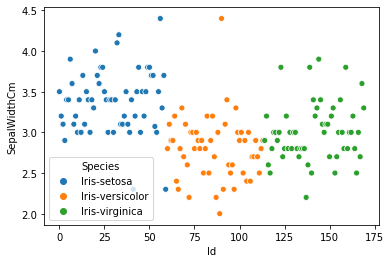

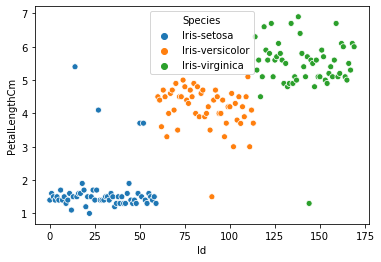

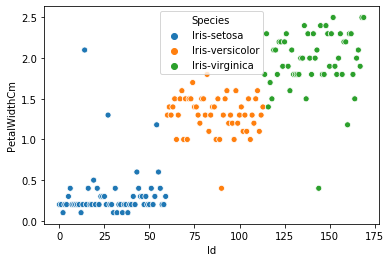

In [19]:
for column in data.columns[1:-1]:
    sns.scatterplot(data=data, x="Id", y=column, hue="Species")
    plt.show()

# Outlier Detection

## 3 Standart Sapma

In [29]:
selected_spec = data[data["Species"] == "Iris-setosa"]
selected_column = selected_spec["SepalLengthCm"]

In [31]:
std = selected_column.std()
avg = selected_column.mean()

In [36]:
three_sigma_plus = avg + (3 * std)
three_sigma_minus = avg - (3 * std)

In [37]:
three_sigma_plus

6.397012123414941

In [38]:
three_sigma_minus

3.724744363611008

In [47]:
selected_column[(selected_spec["SepalLengthCm"] > three_sigma_plus) | (selected_spec["SepalLengthCm"] < three_sigma_minus)].index

Int64Index([14], dtype='int64')

In [61]:
for column in data.columns[1:-1]:
    for spec in data["Species"].unique():
        selected_spec = data[data["Species"]==spec]
        selected_column = selected_spec[column]
        
        std = selected_column.std()
        avg = selected_column.mean()
        
        three_sigma_plus = avg + (3 * std)
        three_sigma_minus = avg - (3 * std) 
        outlier = selected_column[(selected_spec[column] > three_sigma_plus) | (selected_spec[column] < three_sigma_minus)].index
        print(outlier)
        #data.drop(index=outlier, inplace=True)
        

Int64Index([14], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([90], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([14, 27], dtype='int64')
Int64Index([90], dtype='int64')
Int64Index([144], dtype='int64')
Int64Index([14, 27], dtype='int64')
Int64Index([90], dtype='int64')
Int64Index([144], dtype='int64')
